In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.patheffects as pe

In [15]:
# Đọc dữ liệu
df = pd.read_csv("clean data/shopee data.csv")

In [16]:
# Tổng quan dữ liệu
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           5130 non-null   object 
 1   product name  5130 non-null   object 
 2   unit sold     5130 non-null   int64  
 3   review count  5130 non-null   int64  
 4   rating        5130 non-null   float64
 5   price         5130 non-null   int64  
 6   currency      5130 non-null   object 
 7   seller name   5130 non-null   object 
 8   brand         5130 non-null   object 
 9   category      5130 non-null   object 
 10  revenue       5130 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 441.0+ KB


In [17]:
# 5 dòng đầu tiên
df.head()

,url,product name,unit sold,review count,rating,price,currency,seller name,brand,category,revenue
0,https://shopee.vn/Ch%C3%A2n-%C4%91%E1%BA%BF-g%...,Chân đế gài dành cho Camera IMOU / EZVIZ,10000,1400,4.9,20000,vnd,Công Nghệ SEC,IMOU,Điện Thoại,200000000
1,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,Điện thoại Apple iPhone 16 Pro Max 256GB,60000,16300,5.0,31790000,vnd,Apple Flagship Store,Apple,Điện Thoại,1907400000000
2,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,Điện thoại Xiaomi Redmi Note 14 (4G) 6GB 128GB...,6000,711,5.0,4159000,vnd,Trần Ngọc Mobile Store,Xiaomi,Điện Thoại,24954000000
3,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,Điện Thoại Samsung Galaxy A56 5G 8GB/128GB - H...,4000,859,4.9,7929000,vnd,Điện Thoại Chính Hãng HồngHạnh,Samsung,Điện Thoại,31716000000
4,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,Điện Thoại Samsung Galaxy A36 5G 8GB/128GB - H...,3000,501,4.9,6549000,vnd,Điện Thoại Chính Hãng HồngHạnh,Samsung,Điện Thoại,19647000000


In [18]:
df[df['unit sold'] == df['unit sold'].max()]

,url,product name,unit sold,review count,rating,price,currency,seller name,brand,category,revenue
4007,https://shopee.vn/Tai-nghe-kh%C3%B4ng-d%C3%A2y...,Tai nghe không dây dẫn khí KY2 PRO OWS HiFi vớ...,100000,3700,5.0,55000,vnd,Topick Fashion,no brand,Tai nghe,5500000000


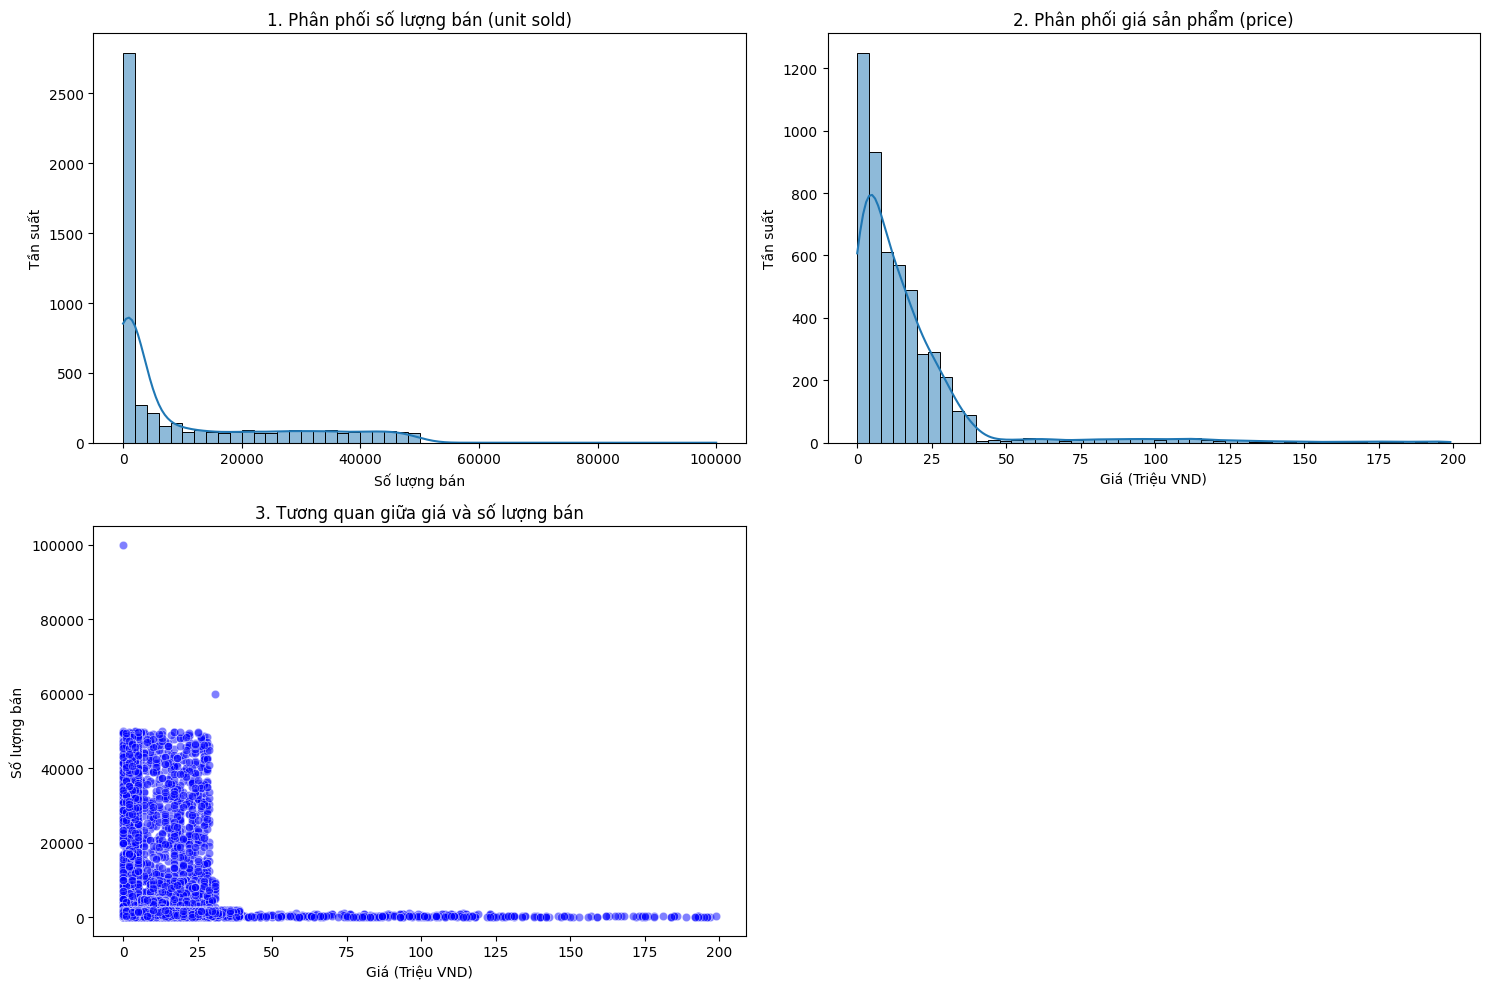

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# --- 1. Phân phối unit sold (Distribution of unit sold) ---
sns.histplot(df["unit sold"], bins=50, kde=True, ax=axes[0][0])
axes[0][0].set_title("1. Phân phối số lượng bán (unit sold)")
axes[0][0].set_xlabel("Số lượng bán")
axes[0][0].set_ylabel("Tần suất")

# --- 2. Phân phối giá (price) (Distribution of price) ---
sns.histplot(df["price"]//np.pow(10,6), bins=50, kde=True, ax=axes[0][1])
axes[0][1].set_title("2. Phân phối giá sản phẩm (price)")
axes[0][1].set_xlabel("Giá (Triệu VND)")
axes[0][1].set_ylabel("Tần suất")

# 3. Mối tương quan giữa price và unit sold (Correlation between price and unit sold)
sns.scatterplot(x=df["price"]//np.pow(10,6), y="unit sold", data=df, alpha=0.5, ax=axes[1][0], color='blue')
axes[1][0].set_title("3. Tương quan giữa giá và số lượng bán")
axes[1][0].set_xlabel("Giá (Triệu VND)")
axes[1][0].set_ylabel("Số lượng bán")

axes[1][1].set_visible(False)

plt.tight_layout()
plt.show()

**1. Phân phối số lượng bán (unit sold)**
- Hình dạng phân phối: Đây là một phân phối lệch phải mạnh (highly right-skewed).
- Điểm tập trung: Đại đa số các sản phẩm có số lượng bán rất thấp, tập trung ở gần mức 0.

    &rarr; Kết luận: Trong lĩnh vực điện tử, một số sản phẩm phụ kiện hoặc các mẫu điện thoại/máy tính bảng rất phổ biến có thể có số lượng bán cao, trong khi phần lớn các mẫu sản phẩm đắt tiền khác có số lượng bán khiêm tốn.

**2. Phân phối giá sản phẩm (price)**
- Hình dạng phân phối: Tương tự như số lượng bán, biểu đồ này cũng cho thấy một phân phối lệch phải mạnh.
- Điểm tập trung: Phần lớn các sản phẩm tập trung ở phân khúc giá dưới 10 triệu VND.

    &rarr; Điều này phù hợp với dữ liệu bao gồm thẻ nhớ (giá thấp) và các thiết bị điện tử giá rẻ, trong khi các sản phẩm như máy tính bảng flagship hoặc máy ảnh chuyên nghiệp chiếm số lượng ít hơn.

**3. Tương quan giữa giá và số lượng bán (Correlation between price and unit sold)**
- Không có mối tương quan tuyến tính rõ ràng, nhưng xu hướng ngược chiều nhẹ: Giá càng cao &rarr; số lượng bán thường thấp hơn.
- Phần lớn điểm tập trung ở vùng giá thấp (<25 triệu) và số lượng bán thấp–trung bình (<50.000).
- Một vài sản phẩm giá thấp được bán rất nhiều (outliers ở góc trên-trái).

    &rarr; Đây là mối quan hệ giá–nhu cầu điển hình: sản phẩm rẻ thường bán chạy hơn. Tuy nhiên, biến động rất lớn, cho thấy còn nhiều yếu tố khác ảnh hưởng đến doanh số (như thương hiệu, tính năng, marketing,...).

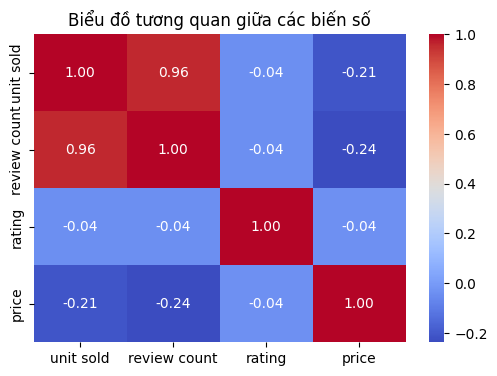

In [20]:
plt.figure(figsize=(6,4))
corr = df[["unit sold", "review count", "rating", "price"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Biểu đồ tương quan giữa các biến số")
plt.show()

**1. Mối quan hệ giữa *unit sold* và *review count***
- Tương quan dương rất mạnh. Điều này có nghĩa là các sản phẩm có số lượng bán càng cao thì số lượng đánh giá (review count) cũng càng nhiều, và ngược lại. Đây là một mối quan hệ logic, vì nhiều người mua hơn dẫn đến nhiều đánh giá hơn.

**2. Mối quan hệ giữa *price* và *review count***
- Tương quan âm yếu. Các sản phẩm giá rẻ hơn có xu hướng nhận được nhiều đánh giá hơn. Điều này có thể do các mặt hàng phụ kiện hoặc sản phẩm giá rẻ có số lượng giao dịch lớn hơn, dẫn đến nhiều cơ hội để khách hàng để lại đánh giá.

**3. Mối quan hệ giữa *price* và *unit sold***
- Tương quan âm yếu. Giá sản phẩm có ảnh hưởng nhỏ đến số lượng bán ra.

### **PHÂN TÍCH THEO DANH MỤC SẢN PHẨM**

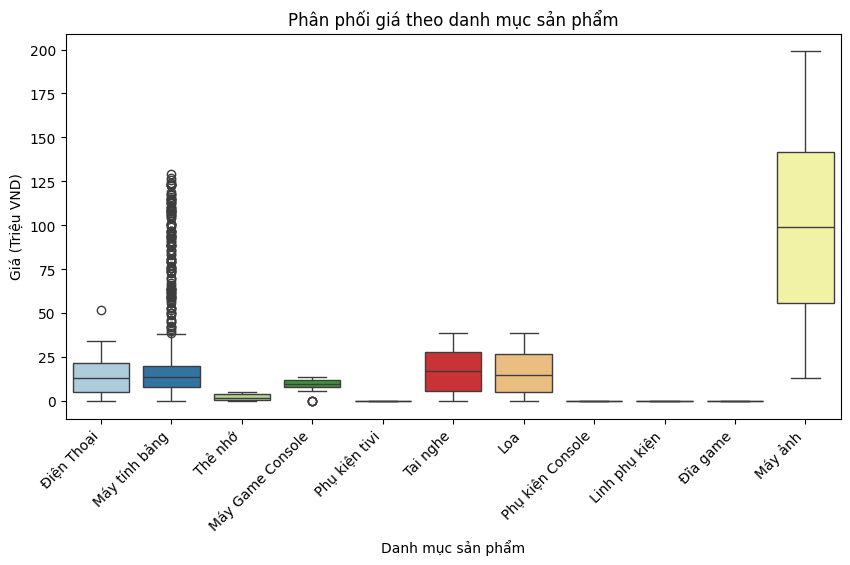

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='category', y=df['price']//np.pow(10,6), hue='category', palette='Paired')
plt.xticks(rotation=45, ha="right")
plt.title("Phân phối giá theo danh mục sản phẩm")
plt.ylabel("Giá (Triệu VND)")
plt.xlabel("Danh mục sản phẩm")
plt.show()

- Máy ảnh có giá trị sản phẩm cao hơn rất nhiều so với các danh mục còn lại.

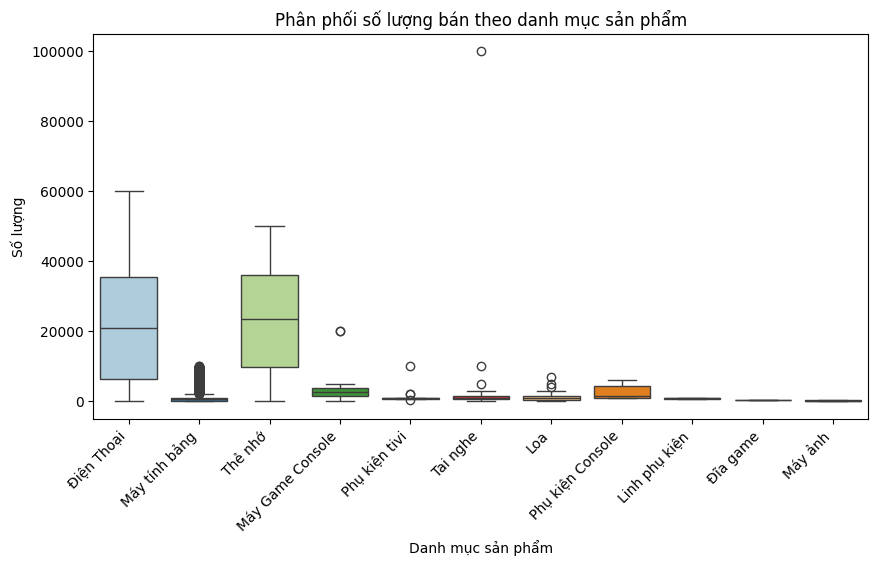

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='category', y='unit sold', hue='category', palette='Paired')
plt.xticks(rotation=45, ha="right")
plt.title("Phân phối số lượng bán theo danh mục sản phẩm")
plt.ylabel("Số lượng")
plt.xlabel("Danh mục sản phẩm")
plt.show()

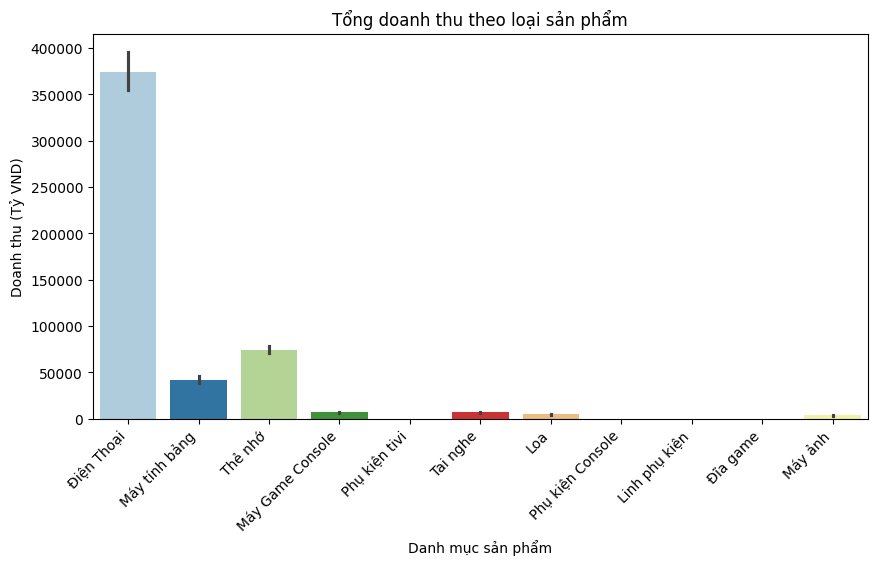

In [23]:
# Thêm cột doanh thu
df["revenue"] = df["unit sold"] * df["price"]

plt.figure(figsize=(10,5))
sns.barplot(x="category", y=df["revenue"]//np.pow(10, 9), data=df, estimator=sum, hue='category', palette='Paired')
plt.title("Tổng doanh thu theo loại sản phẩm")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Danh mục sản phẩm')
plt.ylabel('Doanh thu (Tỷ VND)')
plt.show()

- Điện thoại có doanh thu áp đảo.
- Các danh mục: Phụ kiện tivi, Phụ kiện Console, Linh phụ kiện, Đĩa game không tạo doanh thu đáng kể. Có thể do sản phẩm ít phổ biến, giá thấp hoặc thiếu dữ liệu.

### **PHÂN TÍCH SỐ LƯỢNG VÀ DOANH THU THEO HÃNG**

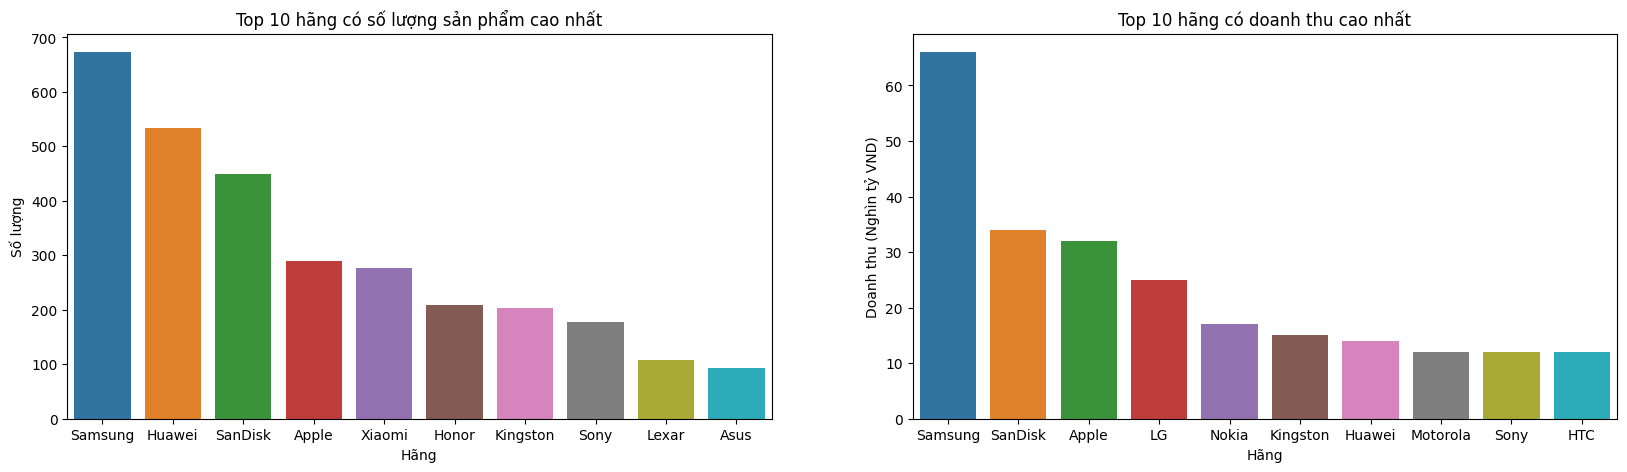

In [24]:
revenue_brand_df = df.groupby("brand")["revenue"].sum().sort_values(ascending=False)
top_10_revenue = revenue_brand_df.to_frame().reset_index()
top_10_revenue = top_10_revenue[top_10_revenue['brand'] != 'no brand']

brand_counts = df["brand"].value_counts().sort_values(ascending=False)
brand_counts = brand_counts.to_frame().reset_index()
brand_counts.columns = ["brand", "num_products"]
brand_counts = brand_counts[brand_counts['brand'] != 'no brand']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Số lượng sản phẩm
sns.barplot(data=brand_counts[:10], x='brand', y=brand_counts['num_products'], hue='brand', ax=axes[0])
axes[0].set_title("Top 10 hãng có số lượng sản phẩm cao nhất")
axes[0].set_xlabel('Hãng')
axes[0].set_ylabel('Số lượng')
axes[0].legend().set_visible(False)

# Doanh thu
sns.barplot(data=top_10_revenue[:10], x='brand', y=top_10_revenue['revenue']//np.pow(10,12), hue='brand', ax=axes[1])
axes[1].set_title("Top 10 hãng có doanh thu cao nhất")
axes[1].set_xlabel('Hãng')
axes[1].set_ylabel('Doanh thu (Nghìn tỷ VND)')
axes[1].legend().set_visible(False)

plt.show()

### **PHÂN TÍCH PCA THEO DANH MỤC SẢN PHẨM**

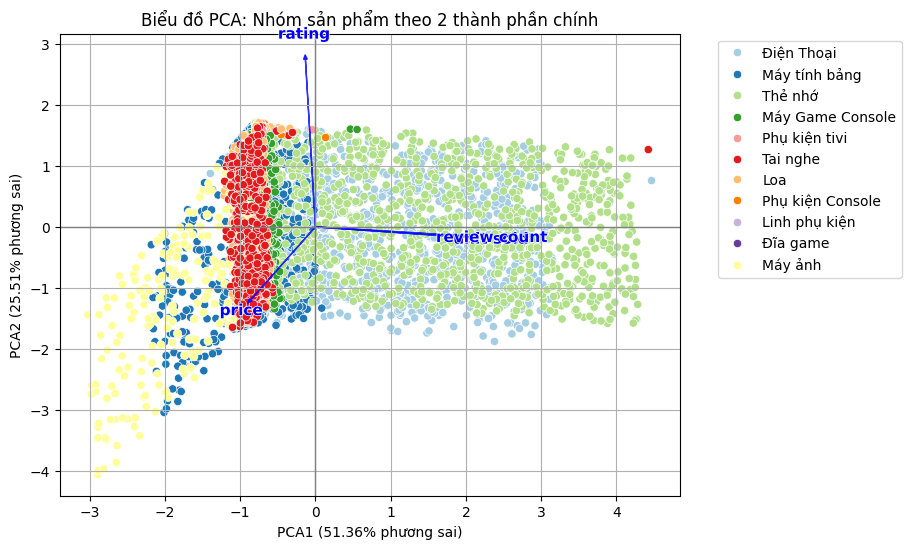

,PCA1,PCA2
unit sold,0.674917,-0.058004
review count,0.678603,-0.050334
rating,-0.044278,0.914457
price,-0.286399,-0.397329


In [25]:
# Chỉ chọn các biến số để phân tích PCA
X = df[["unit sold", "review count", "rating", "price"]]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Thực hiện PCA (2 thành phần)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Thêm kết quả PCA vào DataFrame
df_pca = df.copy()
df_pca["PCA1"] = X_pca[:, 0]
df_pca["PCA2"] = X_pca[:, 1]

# Vẽ biểu đồ PCA, tô màu theo danh mục
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="category", data=df_pca, palette="Paired")
plt.title("Biểu đồ PCA: Nhóm sản phẩm theo 2 thành phần chính")

loadings = pca.components_.T * 3  # nhân 3 cho dễ nhìn
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
              color='blue', alpha=0.8, head_width=0.05)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, 
             color='blue', ha='center', va='center', fontsize=11, weight='bold',
             path_effects=[pe.withStroke(linewidth=1, foreground="white")])

plt.xlabel(f"PCA1 ({pca.explained_variance_ratio_[0]*100:.2f}% phương sai)")
plt.ylabel(f"PCA2 ({pca.explained_variance_ratio_[1]*100:.2f}% phương sai)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.grid(True)
plt.show()

# Phân tích độ quan trọng của từng feature trong PCA
feature_importance = pd.DataFrame(pca.components_.T, 
                                  columns=["PCA1", "PCA2"], 
                                  index=X.columns)
feature_importance

**Phân tích các thành phần chính (PC)**
- PCA1 (Trục ngang) chủ yếu đại diện cho Hiệu suất Bán hàng/Phổ biến. Các biến unit sold và review count có trọng số dương mạnh và gần nhau, cho thấy chúng là các đại lượng gần như tương đương, đo lường sự phổ biến/khối lượng bán.
- PCA2 (Trục dọc) chủ yếu đại diện cho rating. Biến rating có trọng số dương mạnh nhất trên trục này. Biến price có trọng số âm trên PCA2, cho thấy nó có mối quan hệ nghịch với rating trên trục dọc.

**Phân tách rõ ràng: Biểu đồ đã phân tách thành công hai nhóm sản phẩm chính**
- Sản phẩm Giá trị Cao/Ít Bán: Máy tính bảng, Máy ảnh và Loa (Góc dưới bên trái, giá cao, bán chậm).
- Sản phẩm Khối lượng lớn/Phụ kiện: Các mặt hàng khác (Phần lớn bên phải, bán chạy, giá tầm trung).